In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

import severability

# Severability applied to triangular lattice graph

Graph with 66 nodes and 165 edges


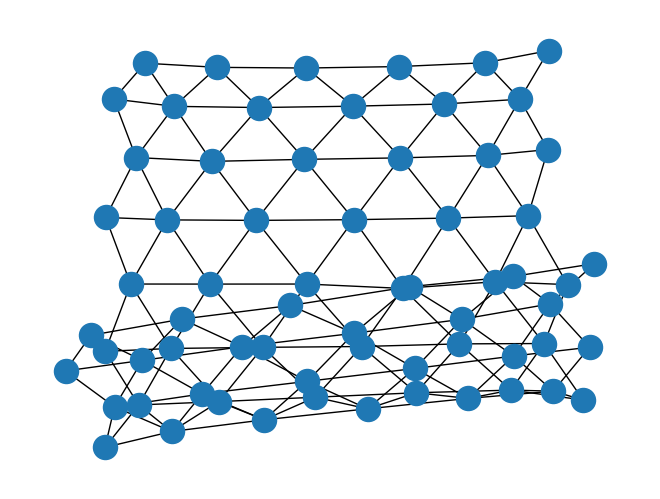

In [2]:
# get triangular lattice graph
G = nx.triangular_lattice_graph(10,10)
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix and convert to np.matrix
A = nx.to_numpy_array(G)
A = np.matrix(A)

# compute transition matrix
P = severability.transition_matrix(A)

In [4]:
times = np.arange(1,10,1)
n_communities = np.zeros_like(times)
s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    s_communities[i] = sizes.mean()
    

100%|██████████| 9/9 [01:04<00:00,  7.14s/it]


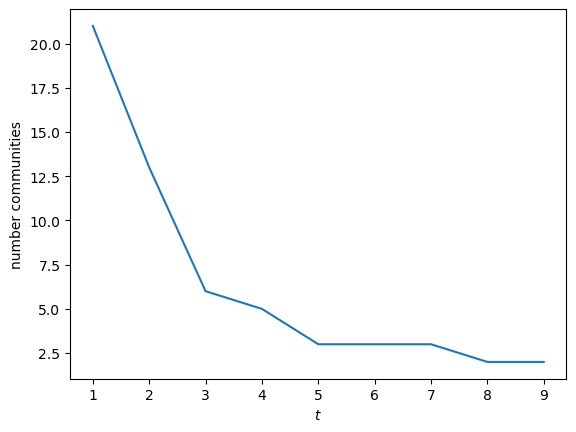

In [5]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="$t$", ylabel="number communities")
plt.show()

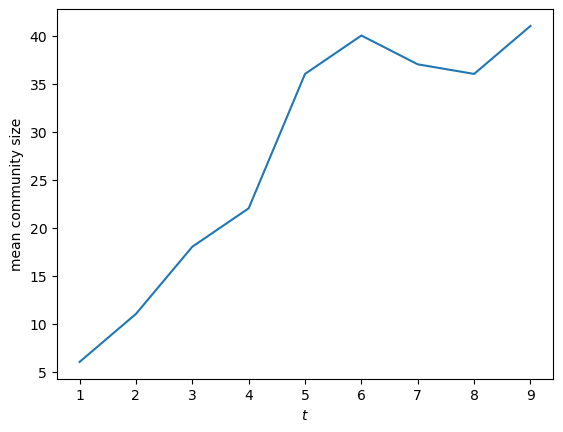

In [6]:
fig, ax = plt.subplots(1)
ax.plot(times,s_communities)
ax.set(xlabel="$t$", ylabel="mean community size")
plt.show()